In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical


In [2]:
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train_full

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

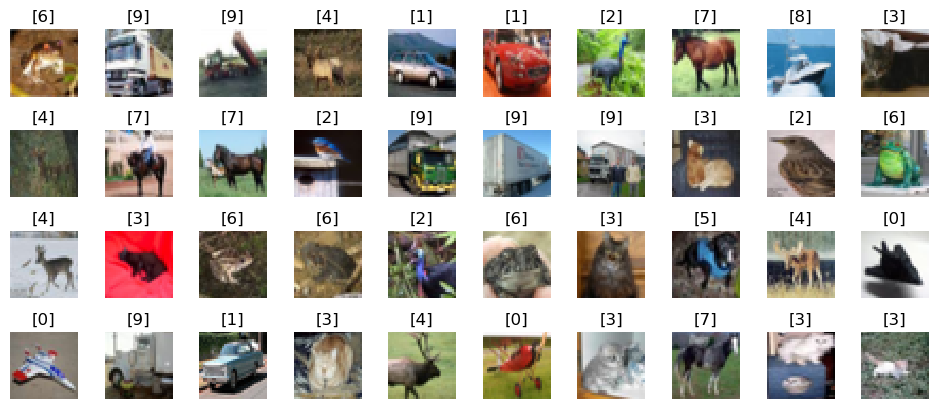

In [5]:
class_names = np.unique(y_train_full)

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_full[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [6]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
X_train.shape

(45000, 32, 32, 3)

In [8]:
model = models.Sequential()

# Va hacer 32 Kernels que serán 3X3 es decir
# Recogera de cada 3 pixeles el central para la nueva imagen 
# Podríamos indicar los Strides (1,1) que son las casillas que avanza
# Le decimos que sea 28 x 28 y que tenga un canal
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model.add(layers.Conv2D(32,(3,3),activation="relu"))

# Se va reduciendo la imagen por lo que podemos aumentar el número de filtros, donde la imagen se nos va a la mitad
model.add(layers.MaxPooling2D((2,2)))

# Lo normal es aumentar el número de filtros en la imagen
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
#model.add(layers.MaxPooling2D((2,2)))

# Aplana la capa actual
#model.add(layers.Conv2D(128,(3,3),activation="relu"))
#model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.Flatten())

model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(len(np.unique(y_train_full)),activation="softmax"))

model.summary()

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 886,186 (3.38 MB)

 Trainable params: 886,186 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

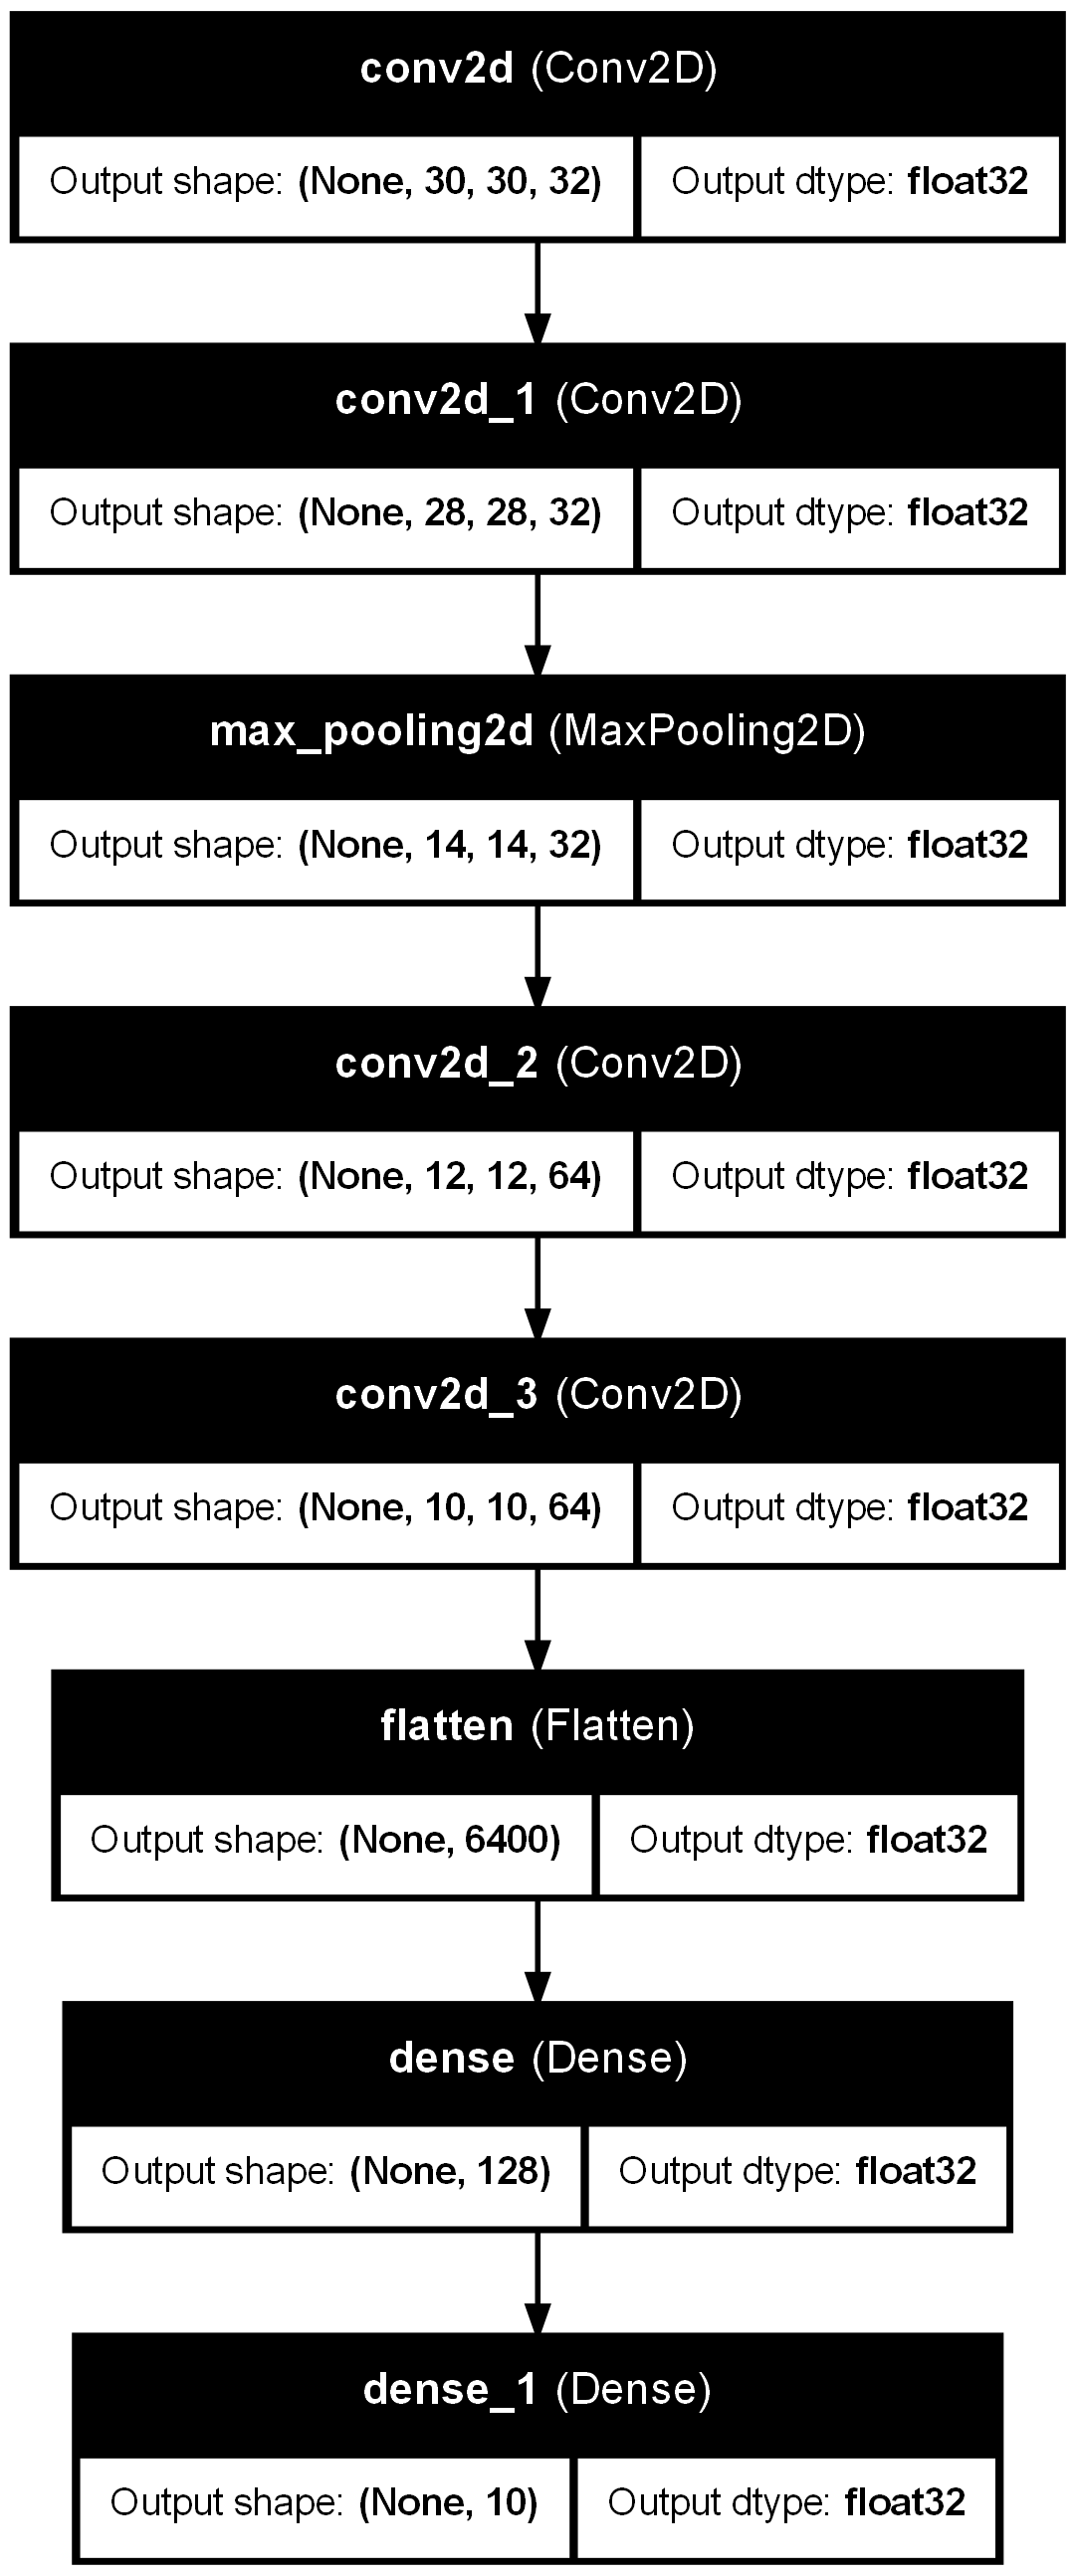

In [9]:
keras.utils.plot_model(model, "model.png", show_shapes=True,show_dtype=True,show_layer_names=True,)

In [10]:
model.compile(loss="sparse_categorical_crossentropy",  optimizer="adam",   metrics=["accuracy"])

In [11]:
X_train

array([[[[0.23529412, 0.32156863, 0.21176471],
         [0.15686275, 0.26666667, 0.14117647],
         [0.20392157, 0.31764706, 0.20392157],
         ...,
         [0.20784314, 0.16862745, 0.19607843],
         [0.25882353, 0.21568627, 0.23921569],
         [0.28627451, 0.24313725, 0.26666667]],

        [[0.43921569, 0.44705882, 0.44705882],
         [0.22745098, 0.27843137, 0.21960784],
         [0.22745098, 0.31764706, 0.20784314],
         ...,
         [0.21176471, 0.18431373, 0.20784314],
         [0.2627451 , 0.22745098, 0.25490196],
         [0.28235294, 0.24313725, 0.27058824]],

        [[0.66666667, 0.63137255, 0.69803922],
         [0.46666667, 0.4627451 , 0.47058824],
         [0.31372549, 0.34901961, 0.29019608],
         ...,
         [0.21960784, 0.19607843, 0.21960784],
         [0.2745098 , 0.24705882, 0.2745098 ],
         [0.28235294, 0.25098039, 0.27843137]],

        ...,

        [[0.35686275, 0.44313725, 0.36862745],
         [0.23137255, 0.3254902 , 0.24313725]

In [12]:

import sys

#gpus = tf.config.experimental.list_physical_devices('GPU')
#print(gpus)
#tf.config.set_visible_devices([], 'CPU') # hide the CPU
#tf.config.set_visible_devices(gpus[0], 'GPU') # unhide potentially hidden GPU
#tf.config.get_visible_devices()


cpus = tf.config.experimental.list_physical_devices('CPU')
print(cpus)
tf.config.set_visible_devices([], 'GPU')  # hide the GPU
tf.config.set_visible_devices(cpus[0], 'CPU') # unhide potentially hidden CPU
tf.config.get_visible_devices()

early_stopping_cb = keras.callbacks.EarlyStopping(patience=1,restore_best_weights=True)

def generador_imagenes(bs):
    for i in range(0,len(X_train),bs):
        px = X_train[i:i+bs]
        py = y_train[i:i+bs]
        yield px,py

history = model.fit(generador_imagenes(10),epochs=sys.maxsize,validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb])

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Epoch 1/9223372036854775807


   4496/Unknown 76s 16ms/step - accuracy: 0.3847 - loss: 1.6743

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4500/4500 ━━━━━━━━━━━━━━━━━━━━ 78s 16ms/step - accuracy: 0.3848 - loss: 1.6741 - val_accuracy: 0.5928 - val_loss: 1.1361
Epoch 2/9223372036854775807
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 1s 304us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5928 - val_loss: 1.1361


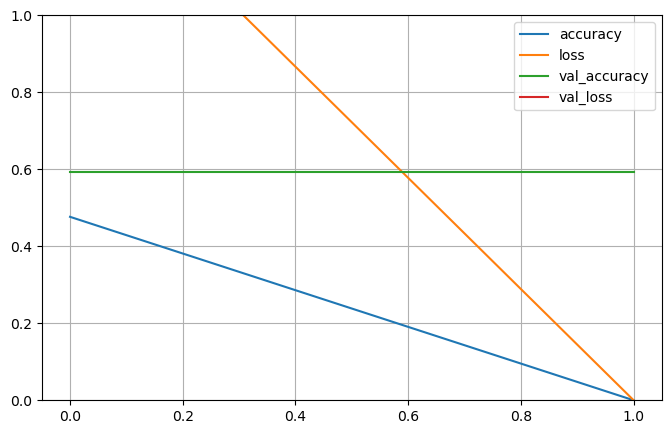

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5848 - loss: 1.1536


[1.1557259559631348, 0.5843999981880188]

In [15]:
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_true_labels = y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


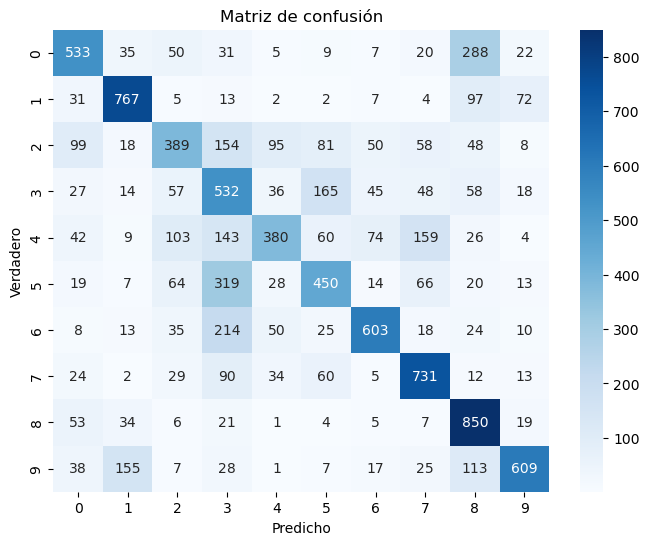

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_true_labels, y_test_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de confusión')
plt.show()